In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
cities = pd.read_csv("data/california_cities.csv",index_col=[0])
cities.head()
cities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 482 entries, 0 to 481
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city                482 non-null    object 
 1   latd                482 non-null    float64
 2   longd               482 non-null    float64
 3   elevation_m         434 non-null    float64
 4   elevation_ft        470 non-null    float64
 5   population_total    482 non-null    int64  
 6   area_total_sq_mi    480 non-null    float64
 7   area_land_sq_mi     482 non-null    float64
 8   area_water_sq_mi    481 non-null    float64
 9   area_total_km2      477 non-null    float64
 10  area_land_km2       478 non-null    float64
 11  area_water_km2      478 non-null    float64
 12  area_water_percent  477 non-null    float64
dtypes: float64(11), int64(1), object(1)
memory usage: 52.7+ KB


Have 482 city, but have some value is null in columns = [elevation,...]

## Cleaning data

In [31]:
cities = cities.dropna().reset_index(drop = True)
#cities = cities.drop(columns =["Unnamed: 0"])


In [32]:
cities

,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01
3,AlisoViejo,33.575000,-117.725556,127.0,417.0,47823,7.472,7.472,0.000,19.352,19.352,0.000,0.00
4,Alturas,41.487222,-120.542500,1332.0,4370.0,2827,2.449,2.435,0.014,6.342,6.306,0.036,0.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,Yountville,38.403056,-122.362222,30.0,98.0,2933,1.531,1.531,0.000,3.966,3.966,0.000,0.00
423,Yreka,41.726667,-122.637500,787.0,2582.0,7765,10.053,9.980,0.073,26.036,25.847,0.188,0.72
424,YubaCity,39.134722,-121.626111,18.0,59.0,64925,14.656,14.578,0.078,37.959,37.758,0.201,0.53
425,Yucaipa,34.030278,-117.048611,798.0,2618.0,51367,27.893,27.888,0.005,72.244,72.231,0.013,0.02


/var/folders/f2/kclshvmd72g57b3n4bt8pj980000gn/T/ipykernel_6740/610730535.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


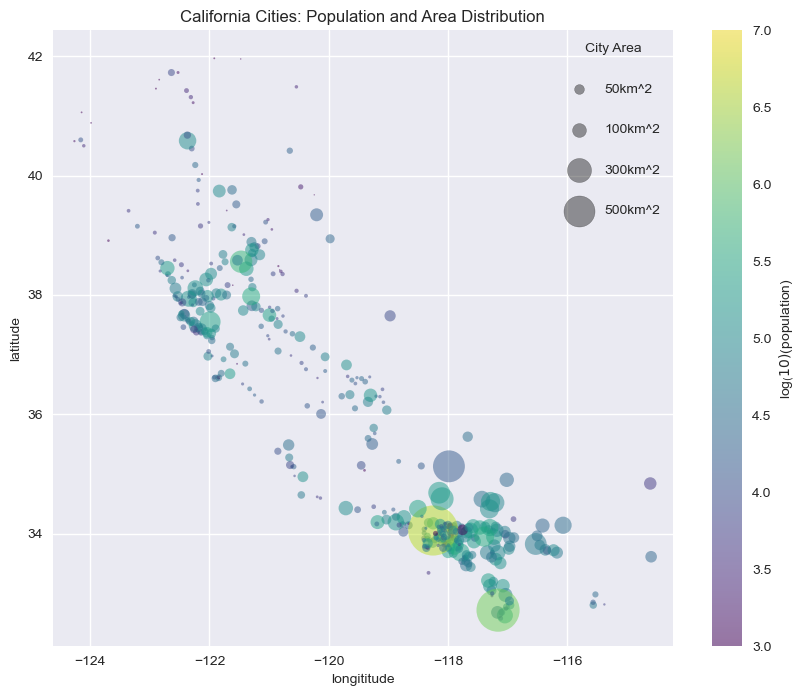

In [61]:
#Extract long-lat
lat, lon = cities['latd'],cities['longd']

population, area = cities['population_total'], cities['area_total_km2']

plt.style.use("seaborn")
plt.figure(figsize=(10,8))
#plot using Pyplot API
plt.scatter(lon,lat
           ,c=np.log10(population),cmap='viridis', s=area
           ,linewidth = 0,alpha= 0.5)
plt.axis('equal')
plt.xlabel("longititude")
plt.ylabel("latitude")
plt.colorbar(label='log$_(10)$(population)');
plt.clim(3,7)

#Create a lenged for city size
area_range = [50,100,300,500]

for area in area_range:
    plt.scatter([],[],c='k',alpha=0.4,s=area,label=str(area) + 'km^2')
    
plt.legend(scatterpoints = 1,labelspacing = 2, title = "City Area")


plt.title("California Cities: Population and Area Distribution");
plt.show();
